In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [4]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print(device)

cuda


In [5]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [6]:
training_epochs = 15
batch_size=100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(),download=True)

mnist_test = dsets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(),download=True)

In [8]:
type(mnist_train)

torchvision.datasets.mnist.MNIST

In [10]:
data_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [11]:
linear = nn.Linear(784,10, bias=True).to(device)

In [12]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

# Train

In [17]:
for epoch in range(training_epochs):
  avg_cost  =0
  total_batch = len(data_loader)
  for X, Y in data_loader:
    X=X.view(-1,28*28).to(device)
    Y=Y.to(device)
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # print(type(cost))
    avg_cost += cost / total_batch
  print(f'epoch: {epoch}/{15} cost: {avg_cost}')

epoch: 0/15 cost: 0.32319000363349915
epoch: 1/15 cost: 0.31155264377593994
epoch: 2/15 cost: 0.30313271284103394
epoch: 3/15 cost: 0.29752856492996216
epoch: 4/15 cost: 0.2927965521812439
epoch: 5/15 cost: 0.28881970047950745
epoch: 6/15 cost: 0.28569918870925903
epoch: 7/15 cost: 0.28300005197525024
epoch: 8/15 cost: 0.2807719111442566
epoch: 9/15 cost: 0.27860328555107117
epoch: 10/15 cost: 0.2768194079399109
epoch: 11/15 cost: 0.2753507196903229
epoch: 12/15 cost: 0.27365967631340027
epoch: 13/15 cost: 0.2723069190979004
epoch: 14/15 cost: 0.2709958851337433


In [21]:
print(len(data_loader))

600


# Test

<class 'torchvision.datasets.mnist.MNIST'>
acc: 0.8784999847412109
label: 7
Prediction:  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


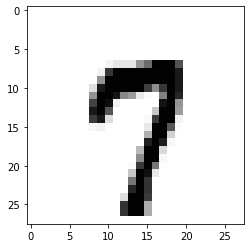

In [34]:
print(type(mnist_test))
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct = torch.argmax(prediction, 1) == Y_test
  acc = correct.float().mean()
  print(f'acc: {acc}')

  r = random.randint(0,len(mnist_test)-1)
  X_single_data = mnist_test.test_data[r].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r].to(device)

  print(f'label: { Y_single_data}')
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())
  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')